In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#set color
sns.set_palette("Set2")

In [2]:
df = pd.read_csv("AppleStore.csv")
df_desc = pd.read_csv("appleStore_description.csv")

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# dropping duplicated value
df.drop(df.index[df.track_name.duplicated()], inplace=True)

In [5]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df_desc.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


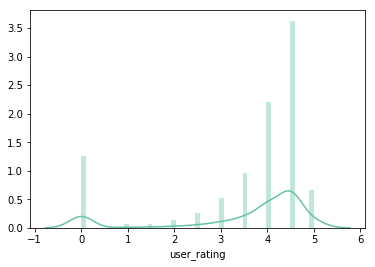

In [7]:
# Look at target first - user_rating - the disrbition
# There are some zeros...maybe no rating for these apps?

sns.distplot(df.user_rating)

In [8]:
len(df[df.rating_count_tot == 0])

929

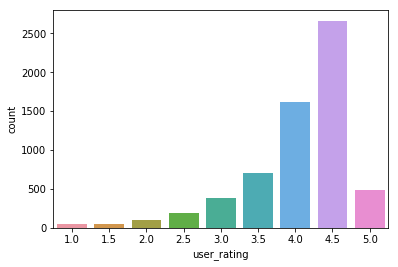

In [9]:
# Look at dist again after removing them
df.drop(df.index[df.rating_count_tot == 0], inplace=True)
# Since its ordinal let's use count plot instead
# sns.distplot(df.user_rating)
sns.countplot(df.user_rating)
# no more zeros now

/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


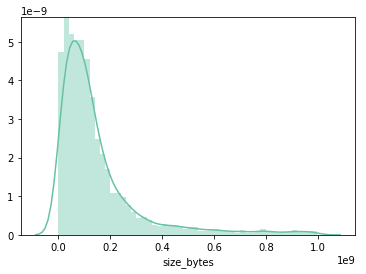

In [10]:
# Size of the apps 
# It's super positively skewed, i want to bin it to greater than 1
sns.distplot(df[df.size_bytes < 1000000000].size_bytes)

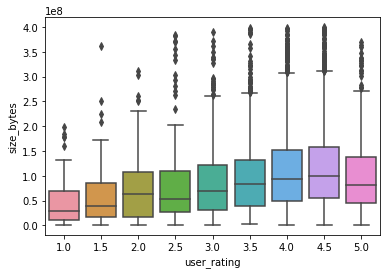

In [11]:
# how the sizes of the app affect rating?
# a general positive trend? funny
sns.boxplot(x='user_rating', y='size_bytes', 
           data=df[df.size_bytes < 400000000])

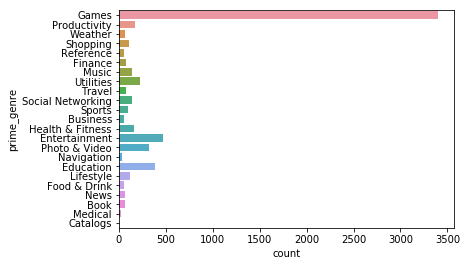

In [12]:
# the genres of the apps?
sns.countplot(y= df["prime_genre"])

/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


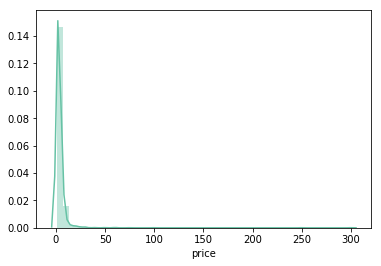

In [13]:
# The price of the app?
# lots of zeros, split into two groups, check paid app dist only
sns.distplot(df[df.price > 0].price)
# positively skewed? let's bin them

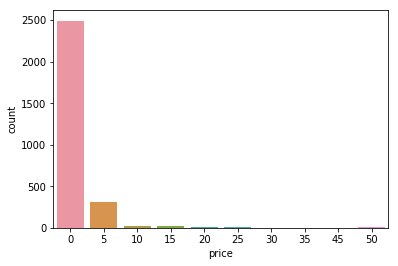

In [14]:
sns.countplot(df[df.price > 0].price.apply(lambda x: math.floor(x/5)*5 if x < 50 else 50 ))
#overwhelmingly less than 5

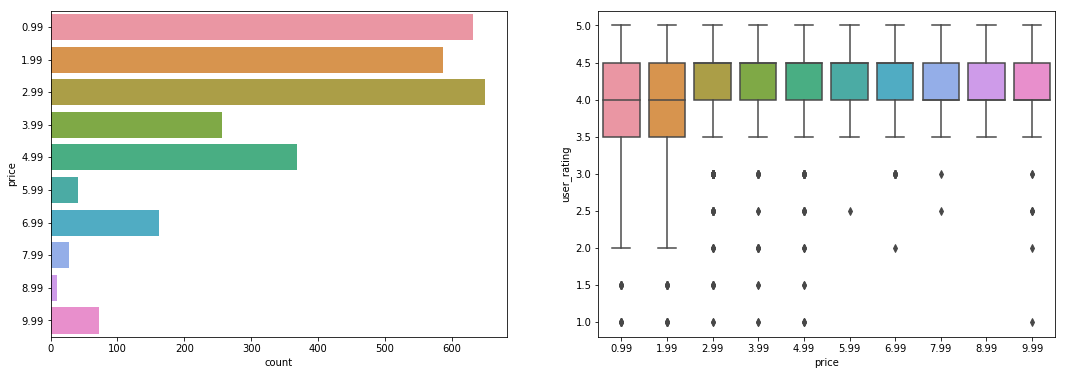

In [15]:
# seems they have a fixed price of x.99
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y=df[(df.price<10) & (df.price > 0)].price, ax=ax1)
sns.boxplot(x="price", y="user_rating", data=df[(df.price<10) & (df.price > 0)], ax=ax2)

# looks like users are less likely to give a low rating if they paid more?

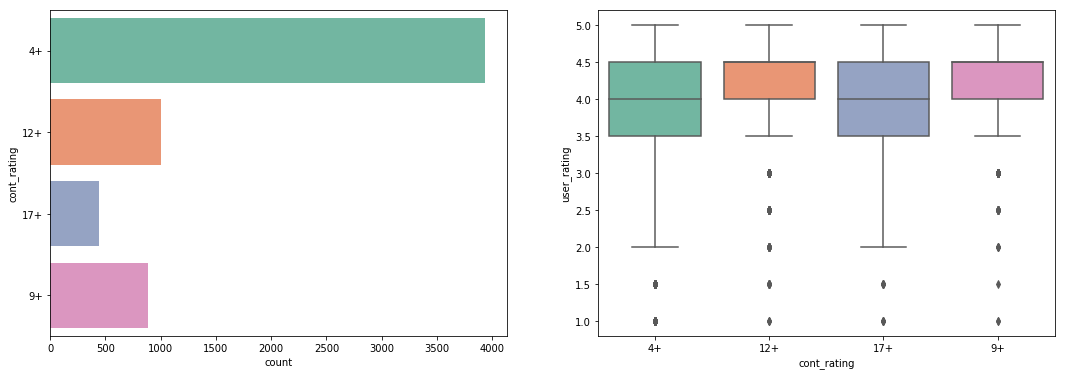

In [16]:
# what about cont_rating? is it related to user rating?
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y=df.cont_rating, ax=ax1)
sns.boxplot(x="cont_rating", y="user_rating", data=df, ax=ax2)

In [17]:
# Let's look at top apps
df.sort_values('user_rating', ascending=False).head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7196,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1
6253,1119514051,"PS Deals+ - Games Price Alerts for PS4, PS3, Vita",70203392,USD,2.99,28,6,5.0,4.5,2.2.1,9+,News,37,5,2,1
6274,1120936238,Cafe Story - Play Cooking & Farming Game,116981760,USD,0.00,1498,79,5.0,5.0,1.1.55,4+,Games,38,5,2,1
855,444745181,Daily Audio Bible App,13282304,USD,0.99,796,0,5.0,0.0,4.6.0,4+,Lifestyle,37,3,5,1
4719,1058287503,酷我音乐HD-无损在线播放,40784896,USD,0.00,1340,264,5.0,5.0,4.0.6,4+,Entertainment,24,5,1,1


[Text(0.5,1,'All apps')]

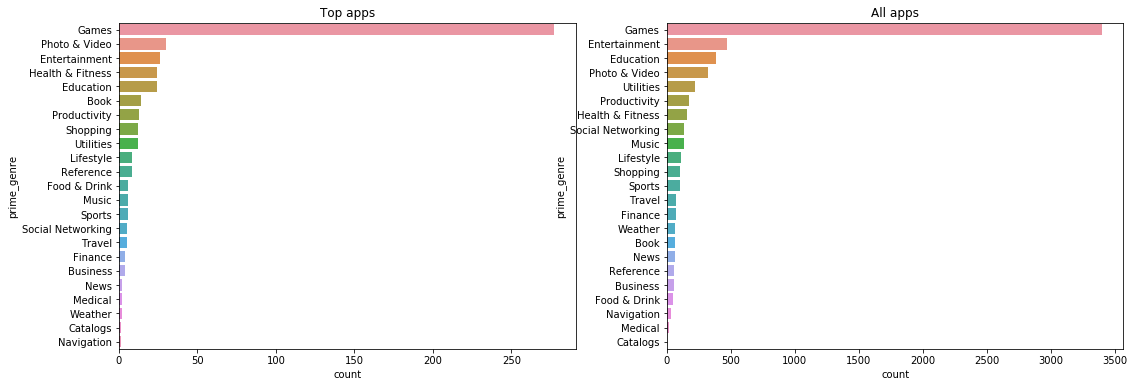

In [18]:
# Maybe we could look ONLY at the top ads? compare with others?
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y= df[df.user_rating == 5]["prime_genre"], ax=ax1, order = df[df.user_rating == 5]["prime_genre"].value_counts().index)
sns.countplot(y= df["prime_genre"], ax=ax2, order=df["prime_genre"].value_counts().index)
ax1.set(title="Top apps")
ax2.set(title="All apps")

# Games do even better in top apps!
# photos app are also receieving more high ratings

[Text(0.5,1,'All apps')]

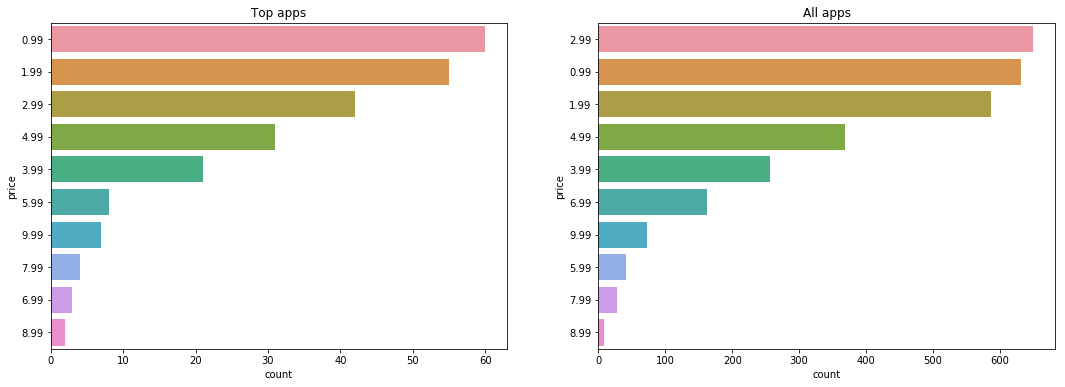

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y= df[(df.price<10) & (df.price > 0) & (df.user_rating == 5)].price, ax=ax1, order = df[(df.price<10) & (df.price > 0)& (df.user_rating == 5)].price.value_counts().index)
sns.countplot(y= df[(df.price<10) & (df.price > 0)].price, ax=ax2, order=df[(df.price<10) & (df.price > 0)].price.value_counts().index)
ax1.set(title="Top apps")
ax2.set(title="All apps")

# though cheap apps are less likely to receive poor ratings
# they are on the other hand could receive good ratings easier

In [20]:
# Maybe we could look at the description of these top apps?
merged = pd.merge(df, df_desc, on="id")

In [21]:
# extract the desc for all top apps (rating == 5) and concat their desc
rep = "\n|\'|\*"
desc_text = merged[merged['user_rating']==5].app_desc.str.replace(rep,"").tolist()

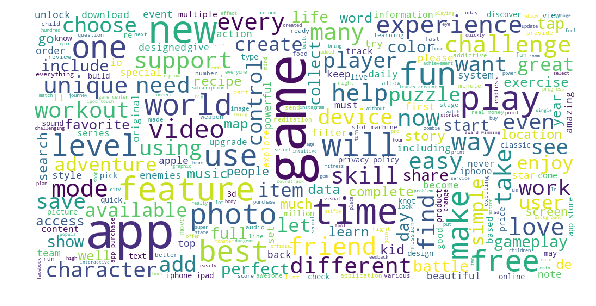

In [22]:
import wordcloud
alltext = ' '.join(desc_text).lower()
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

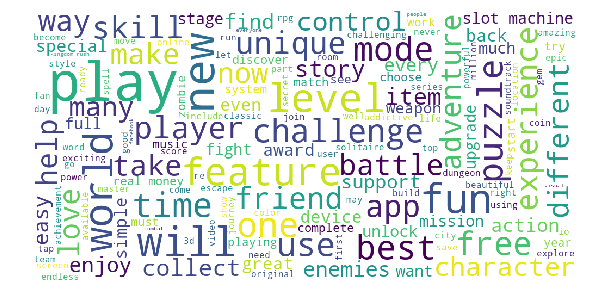

In [36]:
# What about only games?
rep = "\n|\'|\*|game"
desc_text = merged[(merged['user_rating']==5) & (merged['prime_genre']=="Games")].app_desc
desc_text = desc_text.apply(lambda x : x.lower())
desc_text = desc_text.str.replace(rep,"").tolist()

alltext = ' '.join(desc_text)
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=150,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

# People like challenges. Free is attractive too

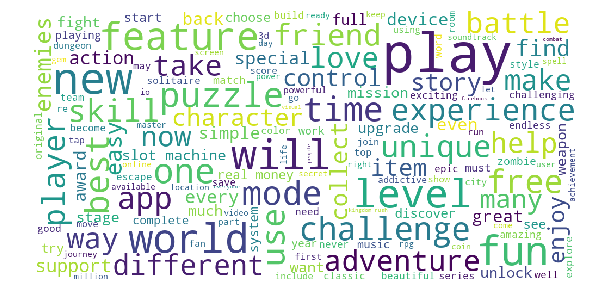

In [23]:
# What about only games?
rep = "\n|\'|\*|game"
desc_text = merged[(merged['user_rating']==5) & (merged['prime_genre']=="Games")].app_desc
desc_text = desc_text.apply(lambda x : x.lower())
desc_text = desc_text.str.replace(rep,"").tolist()

alltext = ' '.join(desc_text)
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=150,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

# People like challenges. Free is attractive too

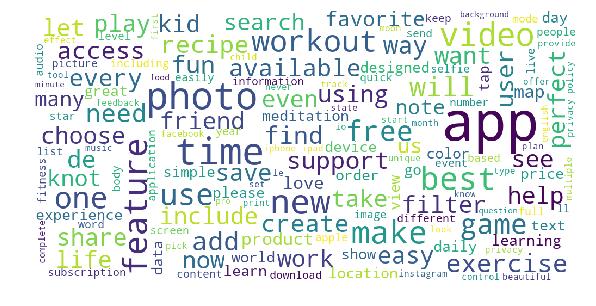

In [24]:
# What about non-games
rep = "\n|\'|\*"
desc_text = merged[(merged['user_rating']==5) & (merged['prime_genre']!="Games")].app_desc
desc_text = desc_text.apply(lambda x : x.lower())
desc_text = desc_text.str.replace(rep,"").tolist()

alltext = ' '.join(desc_text)
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=150,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

# Photos and videos are attractive stuff

In [25]:
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.lib.io import file_io

/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
embed_size = 50 #300 # how big is each word vector
max_features = 20000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 150  # max number of words in a comment to use

In [30]:
list_sentences_train = merged["app_desc"].fillna("_na_").values
y = df.user_rating_ver

#y[0]
#array([1, 0, 0, 0, 0, 0])

#Class for vectorizing texts, indicating how many "indexes" (words) there should be
tokenizer = Tokenizer(num_words=max_features)

#list of texts to train on, build a word index based on the input list
tokenizer.fit_on_texts(list(list_sentences_train))

#tokenizer.word_index
#{'a': 20,
#'about': 160,
#'account': 58,
#'add': 98, ...

#Return list of sequences (one per text input), base on the word index
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)

#list_tokenized_train[0]
#[51, 52, 53, 54, 23, 4, 24, 6, 55, 56, 57, 9, 58, 59]

#padding sequences with 0 with the length of maxlen
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

#X_t[0]
#array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,     0,     0,     0,     0,
      #  0,     0,     0,     0,     0,   813,  4855,   200,  6773,
      # 40,     7,   162,     8,   393,   234,    19,    20,   350, 14246], dtype=int32)

# getting the vectors of each word and store at embedding_index
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')

file_stream = open('glove.6B.50d.txt')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in file_stream)

#embeddings_index['the'] <- the vector that represent this word, size is equal to embed_size
#array([  4.18000013e-01,   2.49679998e-01,  -4.12420005e-01,
    #  1.21699996e-01,   3.45270008e-01,  -4.44569997e-02,
    # -4.96879995e-01,  -1.78619996e-01,  -6.60229998e-04,
    # -6.56599998e-01,   2.78430015e-01,  -1.47670001e-01,
    # -5.56770027e-01,   1.46579996e-01,  -9.50950012e-03,
    #  1.16579998e-02,   1.02040000e-01,  -1.27920002e-01,
    # -8.44299972e-01,  -1.21809997e-01,  -1.68009996e-02,
    # -3.32789987e-01,  -1.55200005e-01,  -2.31309995e-01,
    # -1.91809997e-01,  -1.88230002e+00,  -7.67459989e-01,
    #  9.90509987e-02,  -4.21249986e-01,  -1.95260003e-01,
    #  4.00710011e+00,  -1.85939997e-01,  -5.22870004e-01,
    # -3.16810012e-01,   5.92130003e-04,   7.44489999e-03,
    #  1.77780002e-01,  -1.58969998e-01,   1.20409997e-02,
    # -5.42230010e-02,  -2.98709989e-01,  -1.57490000e-01,
    # -3.47579986e-01,  -4.56370004e-02,  -4.42510009e-01,
    #  1.87849998e-01,   2.78489990e-03,  -1.84110001e-01,
    # -1.15139998e-01,  -7.85809994e-01], dtype=float32)

# random initialization for words that aren't in the embbeding file, first get the mean and sd of the values in the embedding file
# the embedding matrix should have a size of (no of max_feature, no of vectors that represents a word), i.e. (20000, 50)
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

# now we tell the embedding matrix the corresponding vector for each word, and match the word_index
# eg. if the word_index for 'the' is 1
# the embedding_matrix[1] will store the vector of 'the' <- getting this info from embedding_index
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [34]:
len(embedding_matrix[0])

50

In [38]:
inp = Input(shape=(maxlen,))

#this would integrate the input and the embedding matrix
#e.g the size of input = (no. of lines (input no), no of words in each line i.e. the max len) (??, 100)
# the size of embedding matrix = (no. of features, no of vectors for each features (word)) = (20000, 50)
# then the embedded result will be (no. of lines, no. of words in each line, no. of vectors for each word) (??, 100, 50)
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(x)
x = GlobalMaxPool1D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(1)(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#file_path = ".model.hdf5"
#ckpt = ModelCheckpoint(file_path, monitor='val_loss', verbose=1,save_best_only=True, mode='min')

#tbCallBack = keras.callbacks.TensorBoard(log_dir=job_dir +'/Graph', histogram_freq=0, write_graph=True, write_images=True)

early = EarlyStopping(monitor="val_loss", mode="min", patience=1)

model.fit(X_t, y, batch_size=256, validation_split=0.3, epochs=15);

Train on 4386 samples, validate on 1880 samples
Epoch 1/15
4386/4386 [==============================] - 32s 7ms/step - loss: -39.4105 - acc: 0.0830 - val_loss: -44.1511 - val_acc: 0.1888
Epoch 2/15
4386/4386 [==============================] - 29s 7ms/step - loss: -43.3818 - acc: 0.1357 - val_loss: -44.1511 - val_acc: 0.1207
Epoch 3/15
4386/4386 [==============================] - 29s 7ms/step - loss: -43.3817 - acc: 0.1113 - val_loss: -44.1511 - val_acc: 0.1080
Epoch 4/15
4386/4386 [==============================] - 28s 6ms/step - loss: -43.3817 - acc: 0.1090 - val_loss: -44.1511 - val_acc: 0.1037
Epoch 5/15
1536/4386 [=========>....................] - ETA: 17s - loss: -43.8104 - acc: 0.1016

KeyboardInterrupt: 